# Практические задания: Pandas

# задание

###### Любым удобным для вас способом создайте dataframe
c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:

type value

A    10

A    14

B    12

B    23

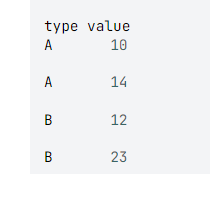

In [1]:
import pandas as pd


In [18]:
s1 = [10,14,12,23]
s2 = ['A','A','B','B']
my_data = pd.DataFrame(zip(s2,s1), columns=['type','value'])

In [20]:
pd.DataFrame(zip(s2,s1))

,0,1
0,A,10
1,A,14
2,B,12
3,B,23


In [19]:
my_data1

,type,value
0,10,A
1,14,A
2,12,B
3,23,B


In [11]:
my_data = pd.DataFrame({'type': ['A', 'A', 'B', 'B'], 'value':[10, 14, 12, 23]})

In [17]:
my_data

,type,value
0,10,A
1,14,A
2,12,B
3,23,B


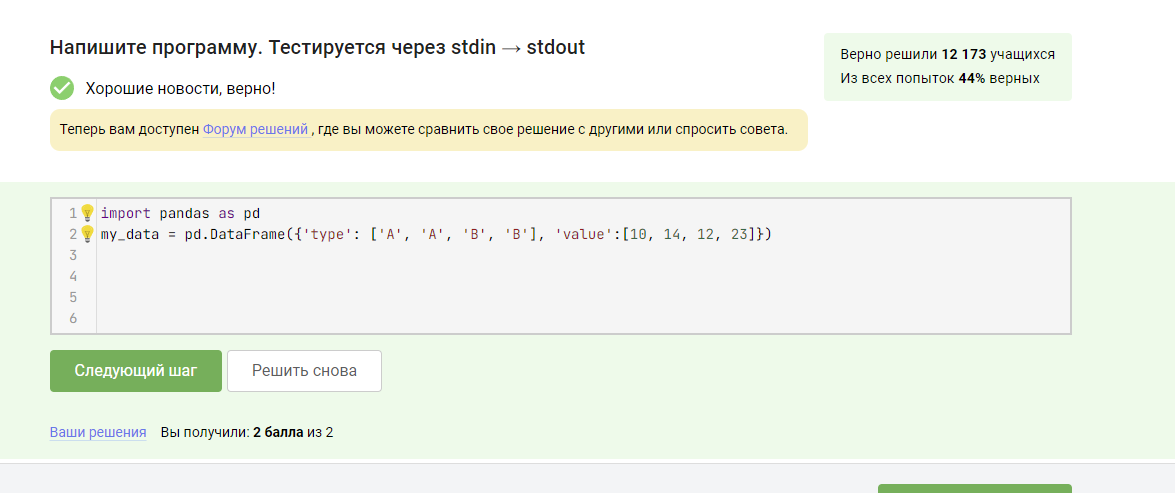

In [15]:
type_list = ["A", "A", "B", "B"]
value_list = [10, 14, 12, 23]
my_data = pd.DataFrame(columns=["type", "value"])
my_data = my_data.assign(type = type_list, value = value_list)


In [ ]:
a, b = list('AABB'), [10, 14, 12, 23]
columns_names = ['type', 'value']

my_data = pd.DataFrame(data=zip(a, b), columns=columns_names)


In [ ]:
v=pd.Series([10,14,12,23])
t=pd.Series(["A","A","B","B"])
my_data=pd.DataFrame({'type':t,'value':v})


In [ ]:
my_data = pd.DataFrame({'type': ['A', 'A', 'B', 'B'], 'value':[10, 14, 12, 23]})

# задание

###### Особенно важный навык при работе с данными - это умение быстро и эффективно отбирать нужные вам колонки или строки.

Начнем с простого, в dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

Помните, что нумерация индексов строк и колонок начинается с 0.

Обратите внимание, получившиеся subset_1 и subset_2 - тоже должны быть dataframe.

Вы можете скачать набор данных, которые нам также пригодятся в следующих заданиях,  и потренироваться у себя на компьютере. Чтобы считать данные при помощи pandas, используйте функцию read_csv.

https://stepik.org/media/attachments/course/4852/my_stat.csv


import pandas as pd

my_stat = pd.read_csv('my_stat.csv')
Важно понимать, в чем разница между pandas loc и iloc. Как отобрать все строки кроме указанных? Умение искать ответы поможет вам на начальных этапах знакомства с pandas!

In [2]:
import pandas as pd

my_stat = pd.read_csv('my_stat.csv')

In [3]:
my_stat

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [4]:
my_stat.loc[:5]


,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
5,2,11.0,A,0.0


In [5]:
my_stat.iloc[:5]

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [13]:
subset_1 = my_stat.iloc[:10,[0,2]]

In [12]:
subset_1 

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [30]:
subset_2 =  my_stat.iloc[1:,[1,3]].drop(index=[4])

In [31]:
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [51]:
%%time
subset_1 = my_stat.iloc[:10,[0,2]]
subset_2 =  my_stat.iloc[1:,[1,3]].drop(index=[4])

CPU times: user 2.49 ms, sys: 0 ns, total: 2.49 ms
Wall time: 2.04 ms


In [52]:
%%time
subset_1 = my_stat.iloc[0:10, [0, 2]]
subset_2 = my_stat.drop([4]).iloc[1:, [1, 3]]

CPU times: user 9.96 ms, sys: 626 µs, total: 10.6 ms
Wall time: 8.77 ms


In [53]:
%%time
subset_1 = my_stat.iloc[0:10, [0, 2]]
subset_2 = my_stat.drop([0, 4]).iloc[:, [1, 3]]

CPU times: user 2.57 ms, sys: 2.41 ms, total: 4.98 ms
Wall time: 4.3 ms


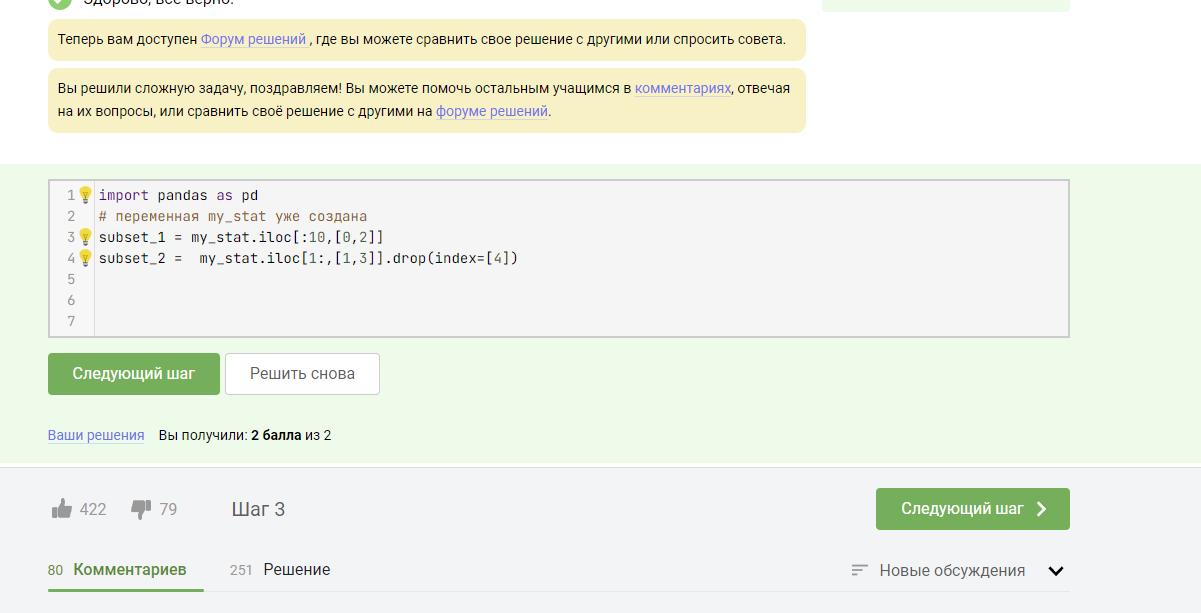

In [54]:
%time
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_2 = my_stat.iloc[:, [1, 3]][~my_stat.index.isin([0, 4])]


CPU times: user 0 ns, sys: 6 µs, total: 6 µs
Wall time: 10 µs


[~my_stat.index.isin([0, 4]]  из первой строки это [not ( my_stat.index.isin([0, 4] )], т.е. индекс не должен быть равен 0 или 4, другие значения индекса ( 1, 2, 3, 5, 6, ...) допустимы.
Так выполняем условие задачи, цитата " сохраните все наблюдения кроме 1 и 5 ". Учитывая, что индексация в датафреймах идёт с 0, поправляем условие на "сохраните все наблюдения кроме 0 и 4" и впихиваем в isin().

In [55]:
%%time
subset_1 = my_stat.filter(items = ['V1', 'V3']).iloc[:10]
subset_2 = my_stat.drop([0, 4])[['V2','V4']]


CPU times: user 5.45 ms, sys: 514 µs, total: 5.96 ms
Wall time: 5.5 ms


# задание

###### Теперь потренируемся отбирать нужные нам наблюдения (строки), соответствующие некому условию. В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:

В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

Как и в предыдущей задаче результат фильтрации - это тоже dataframe.

Фильтрацию данных можно осуществить разными способами, например так или так.

In [56]:
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [71]:
%%time
subset_1 = my_stat.query('V1 >0 & V3=="A"')
subset_2 = my_stat.query('V2 != 10 | V4>=1')

CPU times: user 7.22 ms, sys: 0 ns, total: 7.22 ms
Wall time: 6.63 ms


In [58]:
subset_1

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [62]:
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


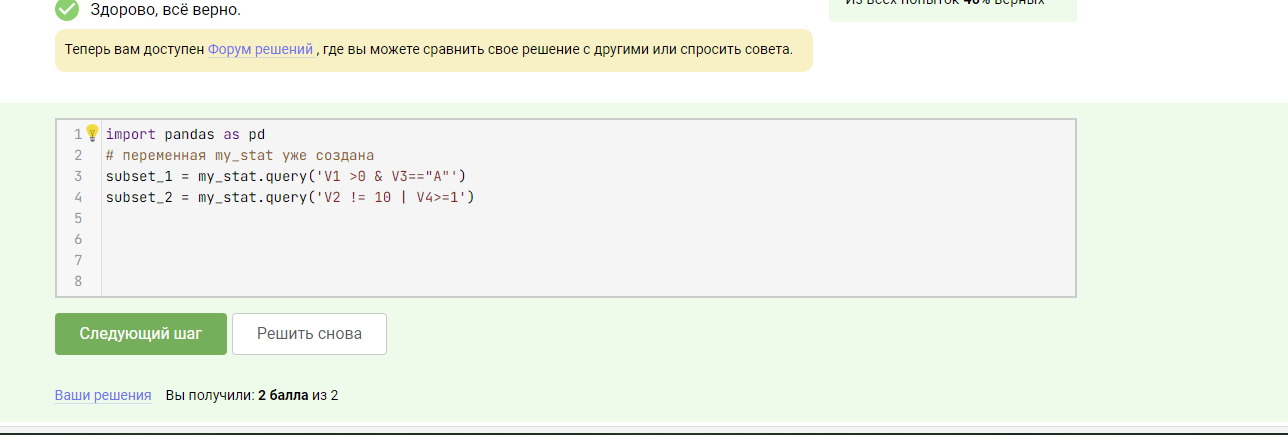

In [72]:
%%time
subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] =="A")]
subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4']>=1)]

CPU times: user 7.98 ms, sys: 1.5 ms, total: 9.48 ms
Wall time: 8.17 ms


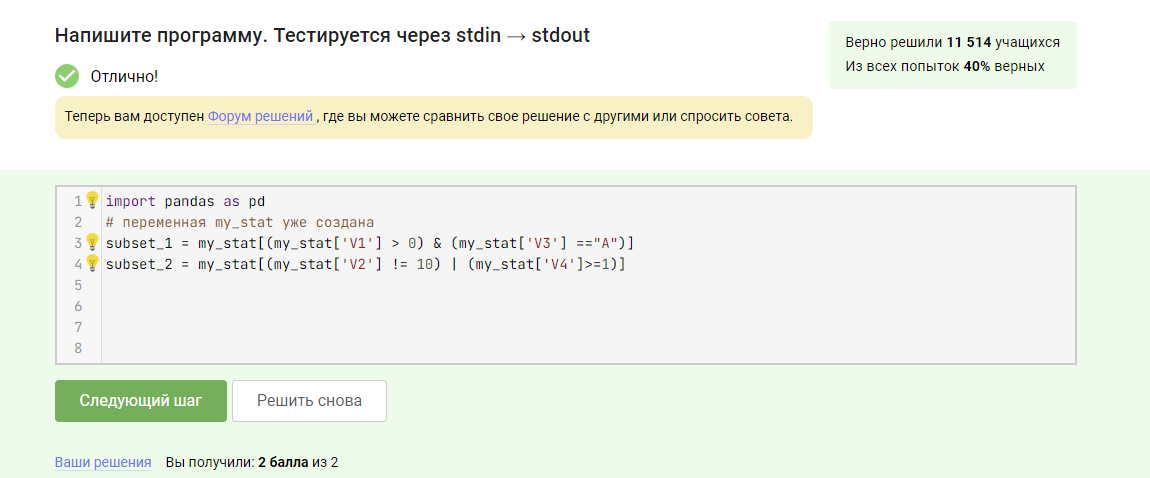

In [73]:
%%time
subset_1 = my_stat.loc[(my_stat['V1'] > 0) & (my_stat['V3']=='A')]
subset_2 = my_stat.loc[(my_stat['V2'] != 10) | (my_stat['V4']>=1)]


CPU times: user 6.61 ms, sys: 0 ns, total: 6.61 ms
Wall time: 6.23 ms


# задание

###### Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. В этих данных (my_stat) создайте две новые переменных:

V5 = V1 + V4

V6 = натуральный логарифм переменной V2

Где найти натуральный логарифм?

In [4]:
my_stat

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [6]:
import numpy as np
my_stat['V5'] = my_stat['V1'] + my_stat['V4'] 
my_stat['V6'] = np.log(my_stat['V2'] )

In [7]:
my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


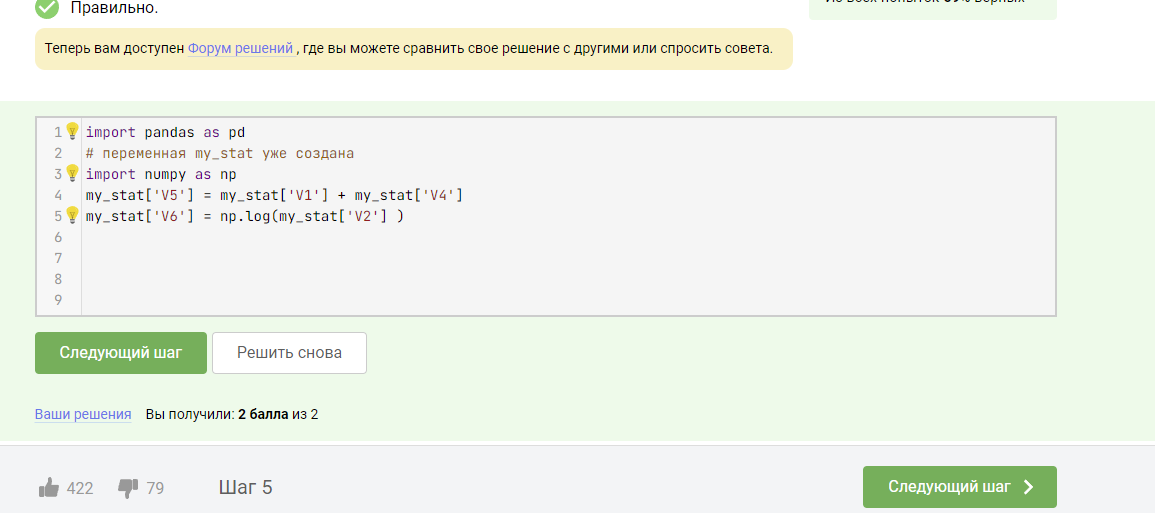

In [ ]:
import numpy as np
my_stat.eval('V5 = V1 + V4', inplace=True)
my_stat.eval('V6 = log(V2)', inplace=True)

In [ ]:
my_stat=my_stat.assign(V5=my_stat.V4+my_stat.V1, V6=np.log(my_stat.V2))


In [ ]:
import math as m
my_stat['V5'] = my_stat.V1 + my_stat.V4
my_stat['V6'] = my_stat.V2.apply(m.log)

# вопрос

###### Отличная работа, закрепим еще пару важных вопросов и можно двигаться дальше.

Переменные V1, V2  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в результате ошибиться в расчетах.

Переименуйте колонки в данных  my_stat следующим образом:

V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users

In [10]:
my_stat = my_stat.rename(columns = ({'V1':"session_value",
                                     'V2':'group',
                                     'V3':"time",
                                     'V4':'n_users'}))

In [11]:
my_stat

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


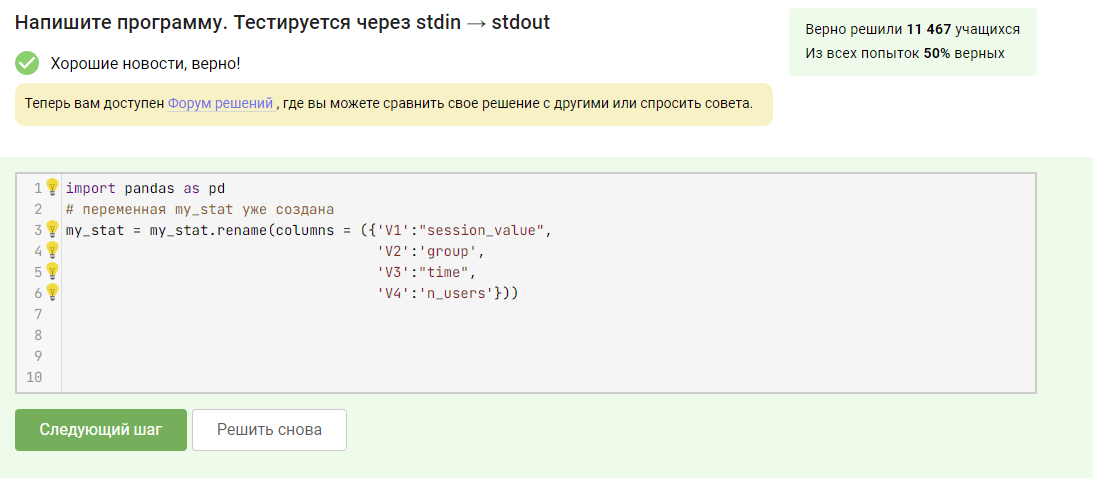

In [ ]:
my_stat.columns = ['session_value','group','time','n_users']


In [ ]:
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}


# вопрос

###### И напоследок давайте разберемся, как заменять наблюдения в данных.

В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html

Как получить медиану переменной n_users без учета отрицательных значений? Если не придумали решения, подсказка - ищите один из возможных ответов в задачах, которые мы уже решили.

Данные для тренировки. https://stepik.org/media/attachments/course/4852/my_stat_1.csv

In [77]:
my_stat = pd.read_csv('my_stat_1.csv')
my_stat


,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [78]:
my_stat.session_value.fillna(0,inplace=True)
my_stat.loc[my_stat.n_users <0, 'n_users']= my_stat[my_stat.n_users >=0].n_users.median()

In [68]:
my_stat.query('n_users <0').n_users

1    -1
8   -11
9   -20
Name: n_users, dtype: int64

In [61]:
my_stat[my_stat.n_users <0]['n_users']

1    -1
8   -11
9   -20
Name: n_users, dtype: int64

In [79]:
my_stat_1.head()

,session_value,time,group,n_users
0,0.0,12.0,B,9.0
1,5.0,5.0,5,5.0
2,1.0,8.0,A,1.0
3,2.0,9.0,B,3.0
4,2.0,10.0,B,9.0


In [38]:
my_stat[my_stat.n_users <0] = my_stat[my_stat.n_users >0].n_users.median()

In [48]:
my_stat.query('n_users >0').n_users.median()

5.0

In [55]:
my_stat.n_users.median()

3.5

In [53]:
my_stat[my_stat.n_users < 0]

,session_value,time,group,n_users
1,NaN,11,A,-1
8,0.0,8,B,-11
9,0.0,9,A,-20


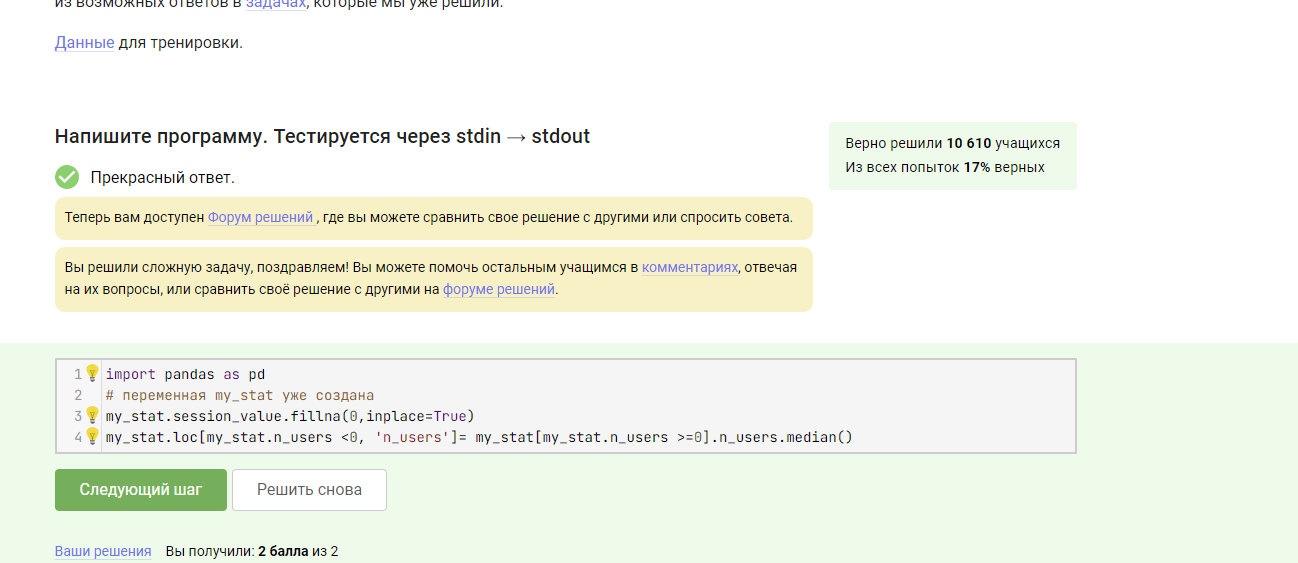

In [ ]:
my_stat['session_value'] = my_stat['session_value'].fillna(0)
med = my_stat.query('n_users >= 0')['n_users'].median()
my_stat.loc[my_stat.n_users < 0, 'n_users'] = med

In [ ]:
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = None
my_stat.fillna(value={'n_users':my_stat['n_users'].median(), 'session_value':0}, inplace=True)

# вопрос

###### Чуть не забыли, никакой анализ данных не обходится без агрегации наблюдений. Напомню, в pandas с этим нам поможет связка  groupby + некоторое преобразование. Например:

# число наблюдений в каждой группе
df.groupby('group_var').count()
Для того, что бы сгруппировать данные по нескольким переменным, используем список с нужными именами:

df.groupby(['group_var_1', 'group_var_2']).count()
Обратите внимание, что при такой записи группирующие переменные станут индексами в итоговом dataframe, изучите справку по groupby, чтобы разобраться со всеми тонкостями группировки данных. Также функция count() применится ко всем колонкам, что не всегда является желанным результатом. Чтобы применить функцию только к нужной колонке в данных, можно использовать связку  groupby() + agg()

my_stat.groupby('group').agg({'n_users': 'count'})
В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [80]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


In [86]:
my_stat.groupby(['group', 'session_value']).count()

time  n_users
group session_value               
A     0.0               3        3
      1.0               1        1
      3.0               1        1
B     0.0               3        3
      2.0               2        2

In [85]:
my_stat.groupby('group').count()

,session_value,time,n_users
group,,,
A,5,5,5
B,5,5,5


In [87]:
my_stat.groupby('group').agg({'n_users': 'count'})

,n_users
group,
A,5
B,5


In [88]:
my_stat.groupby('group').agg({'session_value': 'mean'})

,session_value
group,
A,0.8
B,0.8


In [90]:
my_stat.groupby('group', as_index=False)\
    .agg({'session_value': 'mean'}).rename(columns={'session_value':'mean_session_value'})

,group,mean_session_value
0,A,0.8
1,B,0.8


In [91]:
mean_session_value_data = my_stat.groupby('group', as_index=False)\
    .agg({'session_value': 'mean'}).rename(columns={'session_value':'mean_session_value'})

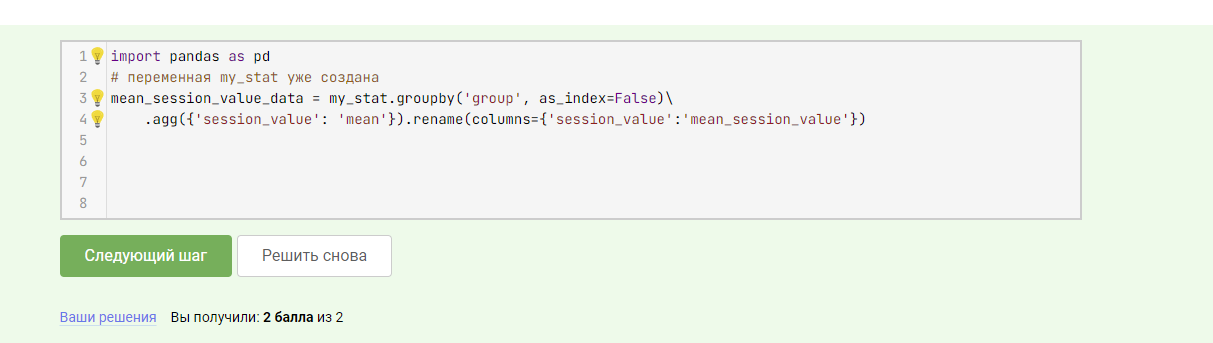

In [ ]:
mean_session_value_data = my_stat.groupby("group",as_index=False).session_value.agg({'mean_session_value':'mean'})


In [94]:
my_stat.groupby("group",as_index=False).session_value.agg({'mean_session_value':'mean'})

,group,mean_session_value
0,A,0.8
1,B,0.8


In [ ]:
mean_session_value_data = my_stat.groupby(['group']).session_value.mean()\
    .reset_index()\
    .rename(columns={'session_value': 'mean_session_value'})


In [ ]:
mean_session_value_data = my_stat.groupby('group', as_index=False)['session_value'].agg('mean').rename(columns={'session_value': 'mean_session_value'})
